In [3]:
## libraries to install ##
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from matplotlib.gridspec import GridSpec
from tabulate import tabulate
from pathlib import Path
import glob

# load customized python scripts
from src.dataset_summary import *
from src.model_summary import *

import plotly.io as pio
pio.renderers.default='notebook'

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

## Change Data Directory Here ##

In [14]:
### SET DATA DIRECTORY ###

## change this directory to your local directory
dirn = '/Users/maedbhking/Documents/hbn_data' # top-level directory where data are saved


# Load Summary Data

Two types of data files are loaded here, preprocessed response data from Parent, Child, and Teacher assessments and diagnosis data.

* Response data: 
* Diagnosis data: 

In [16]:
### default variables ###
diagnosis_name = 'Specific Learning Disorder with Impairment in Reading'
new_diagnosis_name = 'Reading Impairment'
no_diagnosis_name = 'No Diagnosis Given'

### load data ###
df_data_all = load_data(fdir=dirn,
                        assessments=['Parent', 'Child', 'Teacher'], 
                        data_type='preprocessed')

### load diagnosis ###
df_diagnosis = load_diagnosis(fdir=dirn)

# replace `diagnosis_name` with `new_diagnosis_name`
df_diagnosis['Diagnosis'] = df_diagnosis['Diagnosis'].replace(diagnosis_name, new_diagnosis_name) # make easier for visualization
df_diagnosis['Category'] = df_diagnosis['Category'].replace(diagnosis_name, new_diagnosis_name) # make easier for visualization

### filter data ###
data, cols_to_keep = filter_data(
                    data=df_data_all, 
                    diagnosis=df_diagnosis, 
                    remove_demos=True, 
                    col_to_filter='Category', 
                    val_to_filter=[new_diagnosis_name, no_diagnosis_name],
                    drop_identifiers=False
                    )

# remove '_raw' suffix
data.columns = [col.replace('_raw', '') for col in data.columns]


## Summary of Healthy Brain Network 

In [5]:
##########################################
print('SUMMARY OF HEALTHY BRAIN NETWORK \n')

sample_size = df_diagnosis.shape[0]
print(f'1. Sample Size: \n Total sample size of healthy brain network dataset is {sample_size}\n')

diagnosis = df_diagnosis[df_diagnosis['Diagnosis']==new_diagnosis_name]
no_diagnosis = df_diagnosis[df_diagnosis['Diagnosis']==no_diagnosis_name]

num_diagnosis = len(diagnosis)
num_no_diagnosis = len(no_diagnosis)
print(f'2. Diagnoses: \n There are {num_diagnosis} participants with a primary diagnosis of {new_diagnosis_name} and {num_no_diagnosis} with a primary diagnosis of {no_diagnosis_name}\n')

num_sites = len(df_diagnosis['Site'].unique())
sites = df_diagnosis['Site'].value_counts()
site_numbers = sites.index.tolist()
site_count = sites.tolist()
print(f'3. Study Sites: \n There are {num_sites} study sites and the number of participants collected across the following sites are {site_count}: {site_numbers}\n')

years = df_diagnosis['Enroll_Year'].value_counts().index.astype(str).str.strip('.0').astype(int).tolist()
num_years = len(df_diagnosis['Enroll_Year'].unique())
print(f'4. Years of Enrollment: \n Data were collected across {num_years} years: {years}\n')

races = df_diagnosis['Race'].unique()
ethnicity = df_diagnosis['Ethnicity'].unique()
num_races = len(races)
num_ethnicity = len(ethnicity)
print(f'5. Race/Ethnicity: \n There are {num_races} races: {races} \n There are {num_ethnicity} ethnicities: {ethnicity} \n')

##########################################
# print out summaries for specific diagnoses
for diagnosis in [new_diagnosis_name, no_diagnosis_name]:
    print(f'PARTICIPANTS WITH PRIMARY DIAGNOSIS of {diagnosis} \n')
    
    tmp = df_diagnosis[df_diagnosis['Diagnosis']==diagnosis]
    
    sex = tmp['Sex'].value_counts()
    print(f'1. There are {sex.male} males and {sex.female} females\n')

    ages_6_10 = len(tmp[tmp['Age'].round()<=10])
    ages_10_21 = len(tmp[tmp['Age'].round()>10])
    print(f'2. There are {ages_6_10} children ages 6-10 and {ages_10_21} children ages 11-21\n')

    comorbid = round((tmp['comorbidities'].value_counts() / len(tmp)) * 100)
    num_comorbid = comorbid[1:].sum()
    print(f'3. Approximately {num_comorbid}% have disorder combordities\n')
    
    

SUMMARY OF HEALTHY BRAIN NETWORK 

1. Sample Size: 
 Total sample size of healthy brain network dataset is 4767

2. Diagnoses: 
 There are 285 participants with a primary diagnosis of Reading Impairment and 373 with a primary diagnosis of No Diagnosis Given

3. Study Sites: 
 There are 5 study sites and the number of participants collected across the following sites are [2116, 1350, 1191, 77, 33]: [1, 4, 3, 5, 2]

4. Years of Enrollment: 
 Data were collected across 8 years: [2018, 2019, 2017, 202, 2016, 2021, 2015, 2022]

5. Race/Ethnicity: 
 There are 8 races: ['Unknown' 'Hispanic' 'Two or more races' 'Asian' 'Black/African American'
 'White/Caucasian' 'Native American'
 'Native Hawaiian/Other Pacific Islander'] 
 There are 3 ethnicities: ['Unknown' 'Hispanic or Latino' 'White/Caucasian'] 

PARTICIPANTS WITH PRIMARY DIAGNOSIS of Reading Impairment 

1. There are 153 males and 132 females

2. There are 199 children ages 6-10 and 86 children ages 11-21

3. Approximately 70.0% have diso

## 

<Figure size 640x480 with 0 Axes>

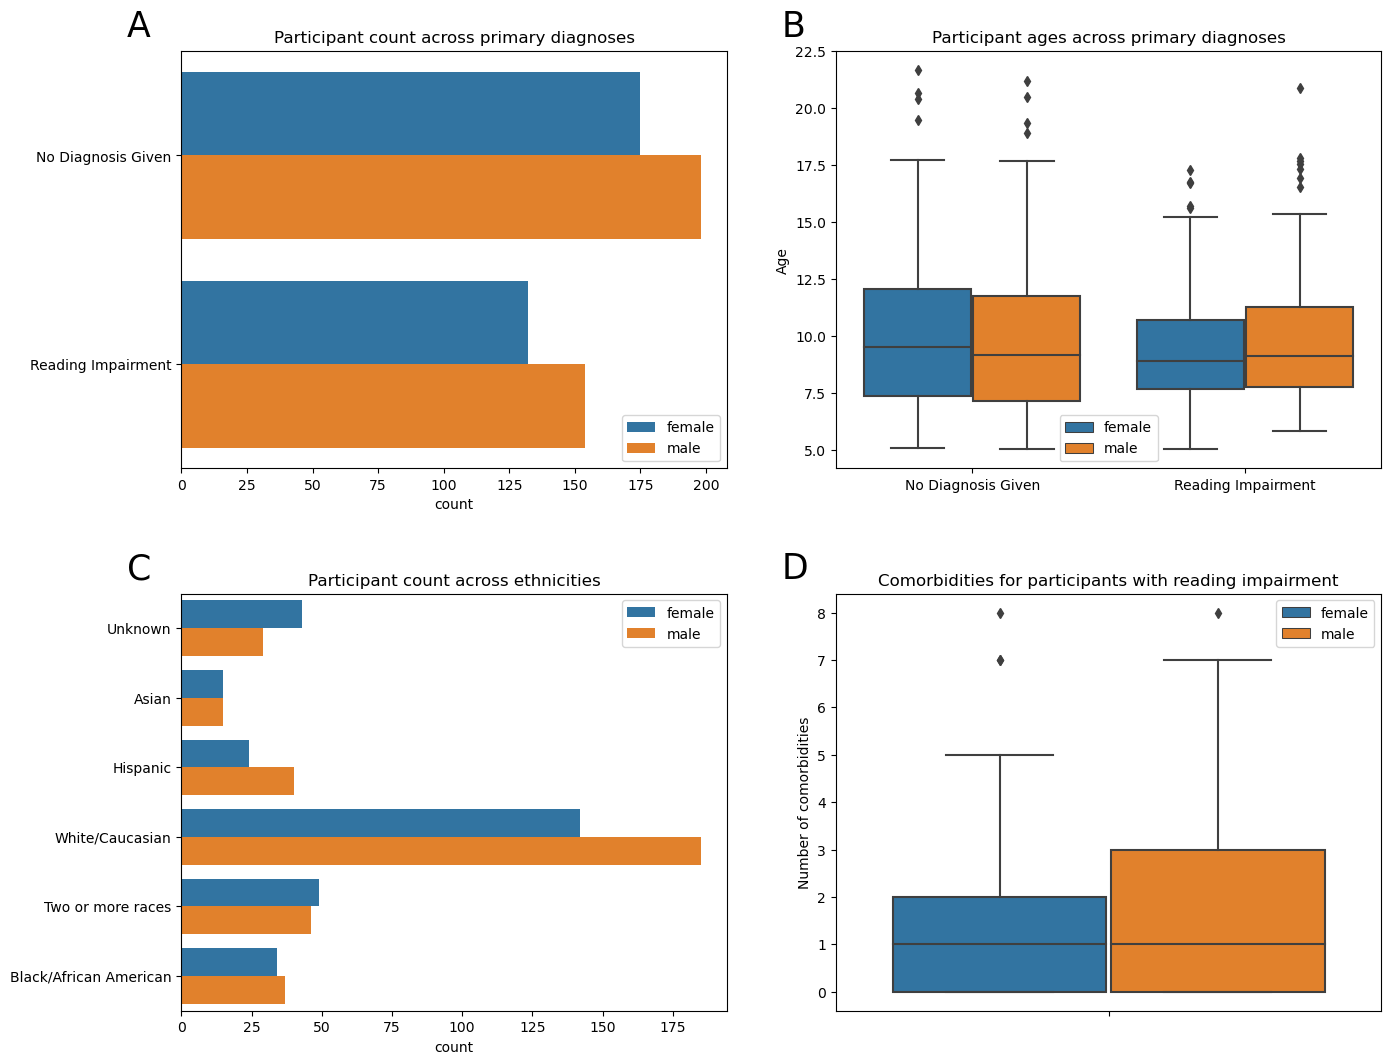

In [6]:
plt.clf()
#plotting_style()
x_pos = -0.1
y_pos = 1.1
labelsize = 25

fig = plt.figure()
gs = GridSpec(2, 2, figure=fig)

ax = fig.add_subplot(gs[0,0])
ax = sns.countplot(data=data, y='Category', hue='Sex', ax=ax)
ax.set_ylabel('')
ax.set_title('Participant count across primary diagnoses')
ax.text(x_pos, y_pos, 'A', transform=ax.transAxes, fontsize=labelsize, verticalalignment='top')
ax.legend_.set_title(None)

ax = fig.add_subplot(gs[0,1])
#ax = sns.violinplot(x='Category', y='Age', hue='Sex', split=True, data=data, ax=ax)
ax = sns.boxplot(x='Category', y='Age', hue='Sex', data=data, ax=ax)
#plt.xticks(rotation=45, ha='right');
# ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_title('Participant ages across primary diagnoses')
ax.text(x_pos, y_pos, 'B', transform=ax.transAxes, fontsize=labelsize, verticalalignment='top')
ax.legend_.set_title(None)

ax = fig.add_subplot(gs[1,0])
tmp = data[data['Race'].isin(['Unknown', 'Hispanic', 'Two or more races', 'Asian',
       'Black/African American', 'White/Caucasian'])]
ax = sns.countplot(data=tmp, y='Race', hue='Sex', ax=ax)
ax.set_ylabel('')
ax.set_title('Participant count across ethnicities')
ax.text(x_pos, y_pos, 'C', transform=ax.transAxes, fontsize=labelsize, verticalalignment='top')
ax.legend_.set_title(None)


ax = fig.add_subplot(gs[1,1])
tmp = data[data['Category']==new_diagnosis_name]
ax = sns.boxplot(x='Category', y='comorbidities', hue='Sex', data=tmp, ax=ax)
ax.set_ylabel('Number of comorbidities')
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_title('Comorbidities for participants with reading impairment')
ax.text(x_pos, y_pos, 'D', transform=ax.transAxes, fontsize=labelsize, verticalalignment='top')
ax.legend_.set_title(None)

plt.subplots_adjust(left=0.125, bottom=0.001, right=2.0, top=2.0, wspace=.2, hspace=.3)

#save_path = os.path.join(dirs.figure, f'fig1.svg')
#plt.savefig(save_path, bbox_inches="tight", dpi=300)

In [2]:
### Set Variables ###
diagnosis_name = 'Specific Learning Disorder with Impairment in Reading'
new_diagnosis_name = 'Reading Impairment'

# load clinical data
dx = pd.read_csv(os.path.join(dirn, 'Clinical_Diagnosis_Demographics.csv'))

# replace `diagnosis_name` with `new_diagnosis_name`
dx = shorten_diagnosis_name(dataframe=dx, old_name=diagnosis_name, new_name=new_diagnosis_name)

# get dataframes
df_primary = dx[dx['DX_01_Cat_new']==new_diagnosis_name]

# get comorbidities
df_co = get_comorbidities(dataframe=df_primary,
                          comorbid_disorders=['Anxiety Disorders', 'Depressive Disorders', 'ADHD', 'Autism Spectrum Disorder']
                          )


tmp = df_co[df_co['Category']!='DX_01_Cat_new']
fig = px.bar(tmp, 
             y="Diagnosis", 
              x="Count", 
             color="Diagnosis Categories", 
             orientation='h',
             title=f'Comorbidities of {new_diagnosis_name}'
                 )
fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)'})
fig.show()


NameError: name 'dirn' is not defined

## Count participants with a primary, secondary, tertiary (etc) diagnosis of Reading Impairment

+---------+----------------------+--------------------+
|   Count |   Diagnosis Category | Diagnosis          |
+=========+======================+====================+
|     286 |                   01 | Reading Impairment |
+---------+----------------------+--------------------+
|     247 |                   02 | Reading Impairment |
+---------+----------------------+--------------------+
|     172 |                   03 | Reading Impairment |
+---------+----------------------+--------------------+
|      61 |                   04 | Reading Impairment |
+---------+----------------------+--------------------+
|      25 |                   05 | Reading Impairment |
+---------+----------------------+--------------------+
|      13 |                   06 | Reading Impairment |
+---------+----------------------+--------------------+
|       7 |                   07 | Reading Impairment |
+---------+----------------------+--------------------+
|       2 |                   08 | Reading Impai

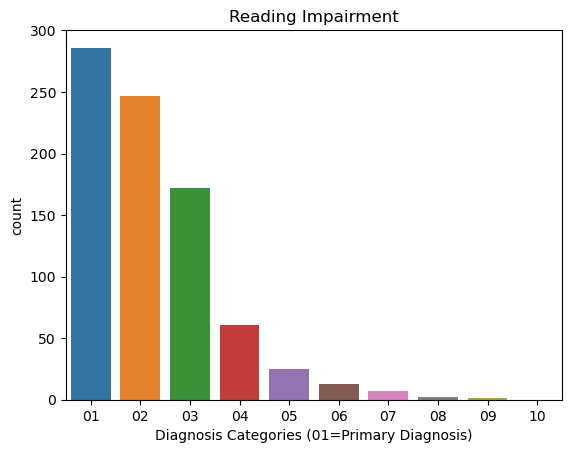

In [8]:
plt.clf()

count_df = count_all_diagnoses(dataframe=dx, diagnosis=new_diagnosis_name)
count_df['diagnosis_categories'] = count_df['diagnosis_categories'].str.replace('_Cat_new', '').str.replace('DX_', '')

sns.barplot(data=count_df, x='diagnosis_categories', y='count')
plt.xlabel('Diagnosis Categories (01=Primary Diagnosis)')
plt.title(new_diagnosis_name)

head = ['Count', 'Diagnosis Category', 'Diagnosis']
print(tabulate(np.array(count_df), headers=head, tablefmt="grid"))

## Year of Enrollment

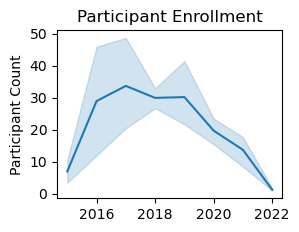

In [9]:
#plt.clf()
#vis.plotting_style()
x_pos = -0.1
y_pos = 1.1
labelsize = 40

fig = plt.figure()
gs = GridSpec(2, 2, figure=fig)

tmp = data.groupby(
    ['Enroll_Year', 'Category', 'Sex']).count()[['Identifiers']].reset_index().rename(
    {'Identifiers': 'Participant Count'}, axis=1)

ax = fig.add_subplot(gs[0,0])
ax = sns.lineplot(data=tmp, x='Enroll_Year', y='Participant Count', ax=ax)
ax.set_xlabel('')
ax.set_title('Participant Enrollment');

In [10]:
tmp = data.groupby(
    ['Enroll_Year', 'Category', 'Sex']).count()[['Identifiers']].reset_index().rename(
    {'Identifiers': 'Participant Count'}, axis=1)

head = ['Enrollment Year', 'Diagnosis', 'Sex', '# of Participants']
print(tabulate(np.array(tmp), headers=head, tablefmt="grid"))

+-------------------+--------------------+--------+---------------------+
|   Enrollment Year | Diagnosis          | Sex    |   # of Participants |
+===================+====================+========+=====================+
|              2015 | No Diagnosis Given | female |                  12 |
+-------------------+--------------------+--------+---------------------+
|              2015 | No Diagnosis Given | male   |                   9 |
+-------------------+--------------------+--------+---------------------+
|              2015 | Reading Impairment | female |                   4 |
+-------------------+--------------------+--------+---------------------+
|              2015 | Reading Impairment | male   |                   3 |
+-------------------+--------------------+--------+---------------------+
|              2016 | No Diagnosis Given | female |                  49 |
+-------------------+--------------------+--------+---------------------+
|              2016 | No Diagnosis Giv

## Participant Count

In [10]:
tmp = data.groupby(
    ['Category', 'Sex']).count()[['Identifiers']].reset_index().rename(
    {'Identifiers': 'Participant Count'}, axis=1)

head = ['Diagnosis', 'Sex', '# of Participants']
print(tabulate(np.array(tmp), headers=head, tablefmt="grid"))


+--------------------+--------+---------------------+
| Diagnosis          | Sex    |   # of Participants |
+====================+========+=====================+
| No Diagnosis Given | female |                 175 |
+--------------------+--------+---------------------+
| No Diagnosis Given | male   |                 198 |
+--------------------+--------+---------------------+
| Reading Impairment | female |                 132 |
+--------------------+--------+---------------------+
| Reading Impairment | male   |                 154 |
+--------------------+--------+---------------------+


## Age

In [11]:
tmp = data.groupby(
    ['Category', 'Sex'])['Age'].agg(
    {'mean', 'std'}).reset_index().rename(
    {'mean': 'age (mean)', 'std': 'age (std)'}, axis=1)

head = ['Diagnosis', 'Sex', 'age (mean)', 'age (std)']
print(tabulate(np.array(tmp), headers=head, tablefmt="grid"))

+--------------------+--------+--------------+-------------+
| Diagnosis          | Sex    |   age (mean) |   age (std) |
+====================+========+==============+=============+
| No Diagnosis Given | female |      3.55391 |    10.1169  |
+--------------------+--------+--------------+-------------+
| No Diagnosis Given | male   |      3.38882 |     9.75773 |
+--------------------+--------+--------------+-------------+
| Reading Impairment | female |      2.53514 |     9.46728 |
+--------------------+--------+--------------+-------------+
| Reading Impairment | male   |      2.9375  |     9.94386 |
+--------------------+--------+--------------+-------------+


## Race/Ethnicity

In [12]:
tmp = data[data['Race'].isin(['Unknown', 'Hispanic', 'Two or more races', 'Asian',
       'Black/African American', 'White/Caucasian'])]

tmp = data.groupby(
    ['Race', 'Sex']).count()[['Identifiers']].reset_index().rename(
    {'Identifiers': 'Participant Count'}, axis=1)

head = ['Race/Ethnicity', 'Sex', '# of Participants']
print(tabulate(np.array(tmp), headers=head, tablefmt="grid"))


+------------------------+--------+---------------------+
| Race/Ethnicity         | Sex    |   # of Participants |
+========================+========+=====================+
| Asian                  | female |                  15 |
+------------------------+--------+---------------------+
| Asian                  | male   |                  15 |
+------------------------+--------+---------------------+
| Black/African American | female |                  34 |
+------------------------+--------+---------------------+
| Black/African American | male   |                  37 |
+------------------------+--------+---------------------+
| Hispanic               | female |                  24 |
+------------------------+--------+---------------------+
| Hispanic               | male   |                  40 |
+------------------------+--------+---------------------+
| Two or more races      | female |                  49 |
+------------------------+--------+---------------------+
| Two or more 

## Comorbidities

In [13]:
tmp = data.groupby(
    ['Category', 'Sex'])['comorbidities'].agg(
    {'mean', 'std'}).reset_index().rename(
    {'mean': 'mean (comorbidities)', 'std': 'std (comorbidities)'}, axis=1)

head = tmp.columns.tolist()
print(tabulate(np.array(tmp), headers=head, tablefmt="grid"))

+--------------------+--------+-----------------------+------------------------+
| Category           | Sex    |   std (comorbidities) |   mean (comorbidities) |
+====================+========+=======================+========================+
| No Diagnosis Given | female |               0       |                0       |
+--------------------+--------+-----------------------+------------------------+
| No Diagnosis Given | male   |               0       |                0       |
+--------------------+--------+-----------------------+------------------------+
| Reading Impairment | female |               1.57463 |                1.53788 |
+--------------------+--------+-----------------------+------------------------+
| Reading Impairment | male   |               1.78247 |                1.75974 |
+--------------------+--------+-----------------------+------------------------+


# Predictive Modeling Results

In [24]:
## default variables ## 
diagnosis_name = 'Specific Learning Disorder with Impairment in Reading'
all_other_diagnoses = ['Depressive Disorders', 'Anxiety Disorders', 'Autism Spectrum Disorder', 'No Diagnosis Given', 'ADHD', 'All Other Diagnoses']
model_names = ['reading-basic_demographics-multiple-classifiers-models', 
             'reading-remove_total_scores_demographics-multiple-classifiers-models',
             'reading-total_scores_demographics-multiple-classifiers-models',
             'reading-age-remove_total_scores_demographics-bestclassifier-models',
             'reading-age-basic_demographics-bestclassifier-models']

# get model data
df_all = load_model_results(
     dirn=dirn, 
     models=model_names,
     diagnosis_name=diagnosis_name,
     all_diagnoses=all_other_diagnoses,
     diagnosis_file='Clinical_Diagnosis_Demographics.csv'
     )

# Get all variables from models
assessments = df_all['assessment'].unique()
clfs = df_all['clf'].unique()
sex = df_all['sex'].unique()
data = df_all['data'].unique()
categories = df_all['category_new'].unique()


## Which is the best classifer?
* Decision Tree Classifier
* Logistic Regression
* Random Forest

#### Random Forest Classifier is the best overall classifier

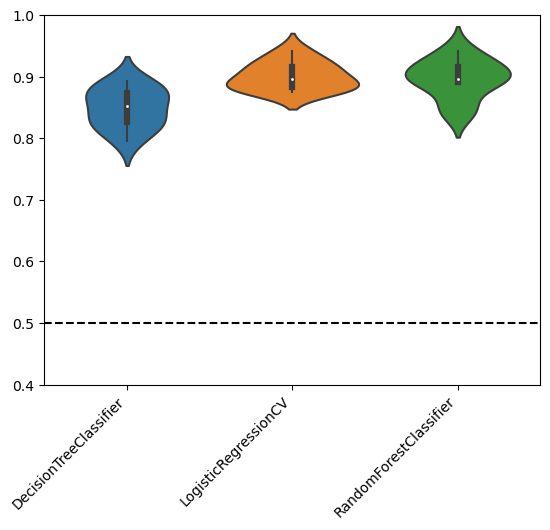

In [25]:
df = filter_model_results(dataframe=df_all,
                       model_names=['reading-basic_demographics-multiple-classifiers-models'],
                       sex=['all'],
                       data=['data'],
                       assessment=['all'],
                       category_new=['No Diagnosis Given'],
                       clf=clfs
                       )

plot_model_results(dataframe=df, 
                   x='clf', 
                   y='roc_auc_score', 
                   hue=None, 
                   split=False,
                   title=''
                  )

## Which model is best?
* Model that includes all features
* Model that includes all features (minus total scores)
* Model that only includes total scores
* Model that only includes *best* secondlevel features

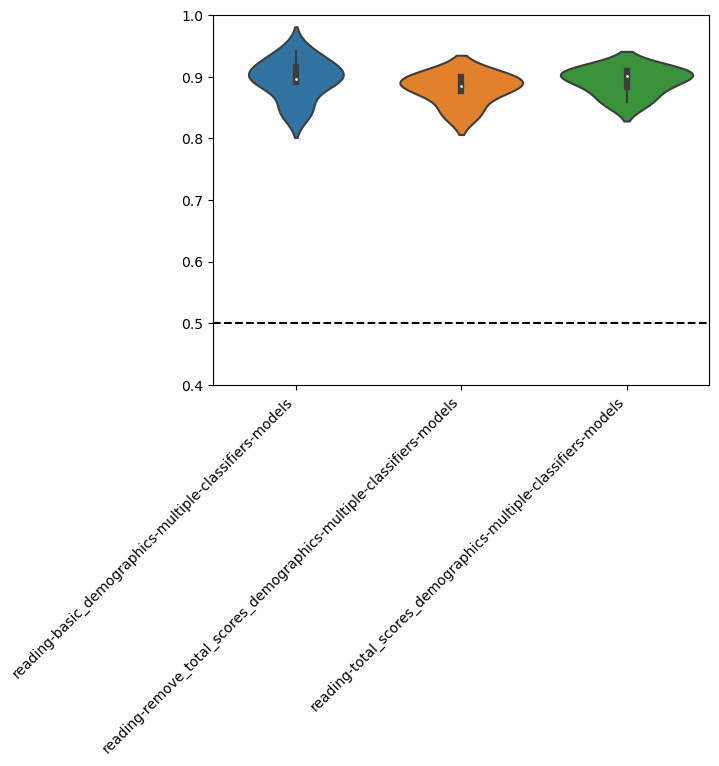

In [37]:
models = ['reading-basic_demographics-multiple-classifiers-models', 
         'reading-remove_total_scores_demographics-multiple-classifiers-models',
         'reading-total_scores_demographics-multiple-classifiers-models']

df = filter_model_results(dataframe=df_all,
                       model_names=models,
                       sex=['all'],
                       data=['data'],
                       assessment=['all'],
                       category_new=['No Diagnosis Given'],
                       clf=['RandomForestClassifier']
                       )

plot_model_results(dataframe=df, 
                   x='model_name', 
                   y='roc_auc_score', 
                   hue=None, 
                   split=False,
                   title=''
                  )

## Which assessment is best?
* Parent Measures
* Child Measures
* Teacher Measures
* All measures

#### Child Measures > Parent Measures > Teacher Measures

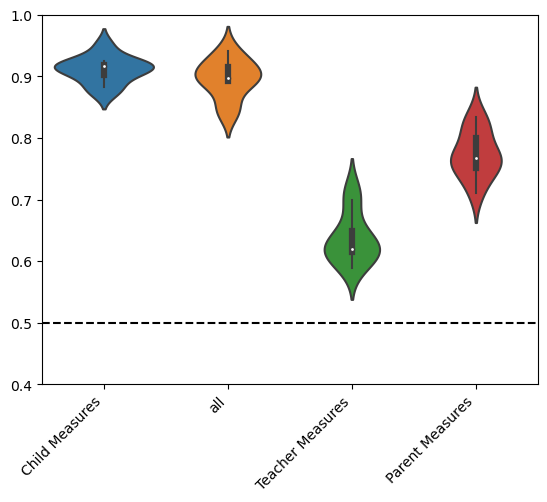

In [75]:
df = filter_model_results(dataframe=df_all,
                       model_names=['reading-basic_demographics-multiple-classifiers-models'],
                       sex=['all'],
                       data=['data'],
                       assessment=assessments,
                       category_new=['No Diagnosis Given'],
                       clf=['RandomForestClassifier']
                       )

plot_model_results(dataframe=df, 
                   x='assessment', 
                   y='roc_auc_score', 
                   hue=None, 
                   split=False,
                   title=''
                  )

## Classification of reading impairment versus other diagnoses
* reading vs. no diagnosis
* reading vs. adhd
* reading vs. depression
* reading vs. anxiety

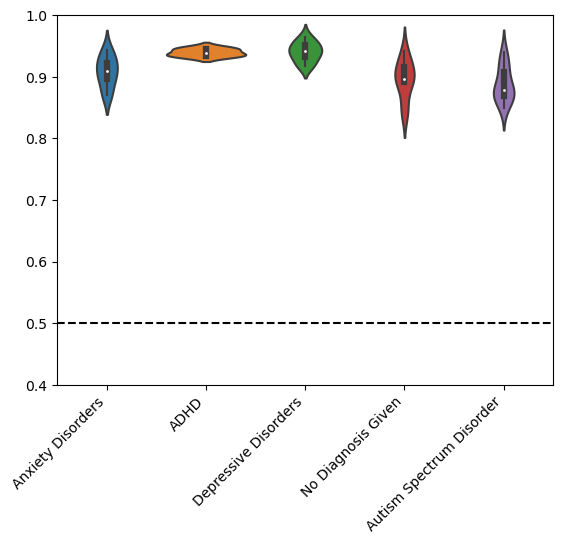

In [72]:
df = filter_model_results(dataframe=df_all,
                       model_names=['reading-basic_demographics-multiple-classifiers-models'],
                       sex=['all'],
                       data=['data'],
                       assessment=['all'],
                       category_new=categories,
                       clf=['RandomForestClassifier']
                       )

plot_model_results(dataframe=df, 
                   x='category_new', 
                   y='roc_auc_score', 
                   hue=None, 
                   split=False,
                   title=''
                  )

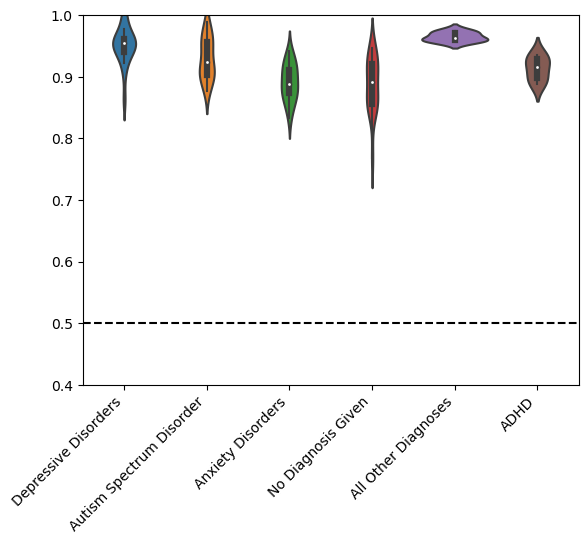

In [70]:
df = filter_model_results(dataframe=df_all,
                       model_names=['reading-basic_demographics-multiple-classifiers-models'],
                       sex=['male', 'female'],
                       data=['data'],
                       assessment=['all'],
                       category_new=categories,
                       clf=['RandomForestClassifier']
                       )

plot_model_results(dataframe=df, 
                   x='category_new', 
                   y='roc_auc_score', 
                   hue=None, 
                   split=False,
                   title=''
                  )

## Classification of males versus females (No Diagnosis Given)

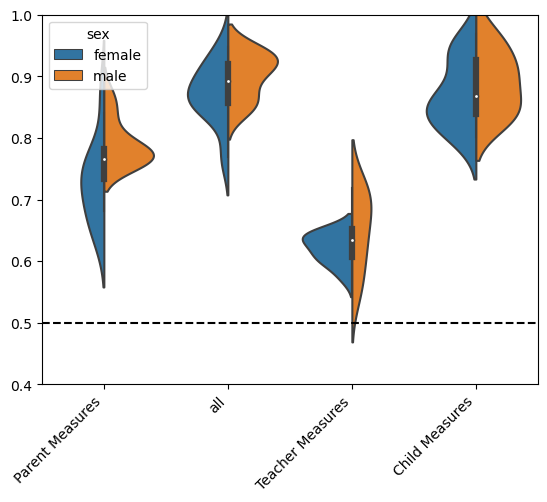

In [68]:
df = filter_model_results(dataframe=df_all,
                       model_names=['reading-basic_demographics-multiple-classifiers-models'],
                       sex=['female', 'male'],
                       data=['data'],
                       assessment=assessments,
                       category_new=['No Diagnosis Given'],
                       clf=['RandomForestClassifier']
                       )

plot_model_results(dataframe=df, 
                   x='assessment', 
                   y='roc_auc_score', 
                   hue='sex', 
                   split=True,
                   title=''
                  )

## Classification of males versus females (All Other Diagnoses)

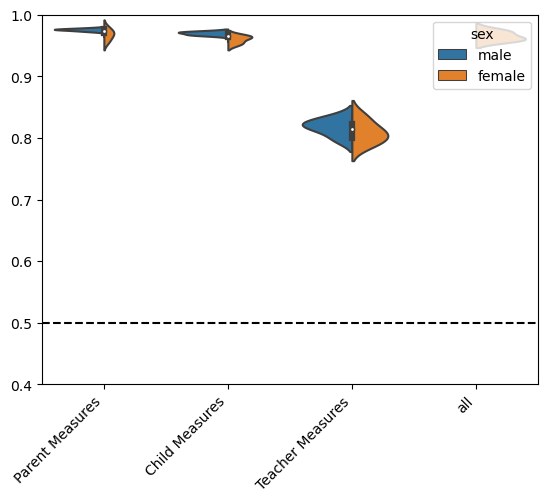

In [64]:
df = filter_model_results(dataframe=df_all,
                       model_names=['reading-basic_demographics-multiple-classifiers-models'],
                       sex=['female', 'male'],
                       data=['data'],
                       assessment=assessments,
                       category_new=['All Other Diagnoses'],
                       clf=['RandomForestClassifier']
                       )

plot_model_results(dataframe=df, 
                   x='assessment', 
                   y='roc_auc_score', 
                   hue='sex', 
                   split=True,
                   title=''
                  )

<Axes: xlabel='age', ylabel='roc_auc_score'>

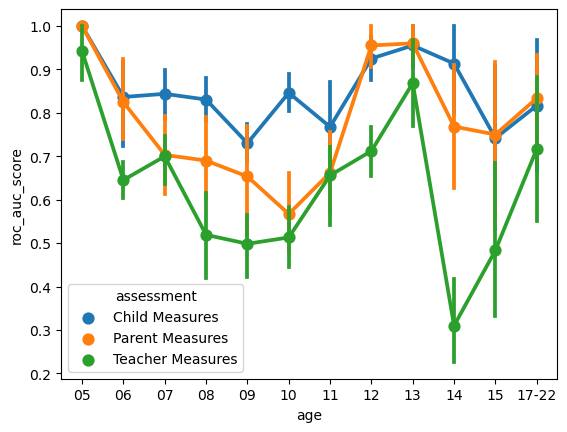

In [82]:
ages_to_keep = ['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17-22']
#ages_to_keep = ['05-06', '07-08', '09-10', '11-12', '13-14', '15-16', '17-22']

df = filter_model_results(dataframe=df_all,
                       model_names=['reading-age-remove_total_scores_demographics-bestclassifier-models'],
                       sex=['all'],
                       data=['data'],
                       assessment=['Parent Measures', 'Child Measures', 'Teacher Measures'],
                       category_new=['No Diagnosis Given'],
                       clf=['RandomForestClassifier'],
                       ages=ages_to_keep
                       )

sns.pointplot(x='age', 
              y='roc_auc_score', 
              hue='assessment', 
              data=df, 
              order=sorted(df['age'].unique())
             )